<a href="https://www.kaggle.com/code/dhanushnarayananr/ukraine-russia-2022-analysis?scriptVersionId=94289773" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd

#Reading the data through pandas
df = pd.read_csv('/kaggle/input/2022-ukraine-russian-war/russia_losses_equipment.csv')
df.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system
0,2022-02-25,2,10,7,80,516,49,4,100,60,0,2,0,NaN,NaN
1,2022-02-26,3,27,26,146,706,49,4,130,60,2,2,0,NaN,NaN
2,2022-02-27,4,27,26,150,706,50,4,130,60,2,2,0,NaN,NaN
3,2022-02-28,5,29,29,150,816,74,21,291,60,3,2,5,NaN,NaN
4,2022-03-01,6,29,29,198,846,77,24,305,60,3,2,7,NaN,NaN


In [2]:
#cumulative describe
df.describe()

,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system
count,63.000000,63.000000,63.000000,63.00000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,44.000000,34.000000
mean,33.000000,112.888889,111.460317,555.68254,1592.174603,260.555556,88.936508,1026.857143,69.111111,74.873016,5.285714,45.714286,22.545455,3.941176
std,18.330303,53.085783,41.708599,230.77477,476.065513,117.788462,38.264729,458.512457,7.569274,67.686300,2.399117,20.318773,5.880415,0.342997
min,2.000000,10.000000,7.000000,80.00000,516.000000,49.000000,4.000000,100.000000,60.000000,0.000000,2.000000,0.000000,10.000000,2.000000
25%,17.500000,66.000000,84.500000,368.00000,1215.500000,137.500000,62.000000,592.500000,60.000000,7.000000,3.000000,33.500000,20.500000,4.000000
50%,33.000000,123.000000,127.000000,586.00000,1694.000000,302.000000,95.000000,1150.000000,73.000000,66.000000,7.000000,54.000000,25.000000,4.000000
75%,48.500000,157.500000,141.500000,735.50000,1955.000000,353.500000,113.000000,1417.500000,76.000000,128.000000,7.000000,63.500000,27.000000,4.000000
max,64.000000,187.000000,155.000000,970.00000,2389.000000,431.000000,151.000000,1688.000000,76.000000,215.000000,8.000000,72.000000,31.000000,4.000000


Total Military Equipments of Russia : Took from https://armedforces.eu/

Aircraft : 5552
helicopter : 1724
tank : 12270

Artillery : 18497
APC : 26831

MRL : 4359
NAVAL SHIP : 664
Special Equip : 1070
Drones: 2000


In [3]:
#checking for null data
df.isna().sum()

date                      0
day                       0
aircraft                  0
helicopter                0
tank                      0
APC                       0
field artillery           0
MRL                       0
military auto             0
fuel tank                 0
drone                     0
naval ship                0
anti-aircraft warfare     0
special equipment        19
mobile SRBM system       29
dtype: int64

In [4]:
#filling null data by zero
df.fillna(0, inplace=True)
df['special equipment']= df['special equipment'].astype(int)
df['mobile SRBM system']= df['mobile SRBM system'].astype(int)

In [5]:
df.isna().sum()

date                     0
day                      0
aircraft                 0
helicopter               0
tank                     0
APC                      0
field artillery          0
MRL                      0
military auto            0
fuel tank                0
drone                    0
naval ship               0
anti-aircraft warfare    0
special equipment        0
mobile SRBM system       0
dtype: int64

In [6]:
#changing the dataframe from cumulative to daily change
needed_list=["aircraft","helicopter","tank","APC","field artillery","MRL","military auto","fuel tank","drone","naval ship","anti-aircraft warfare","special equipment","mobile SRBM system"]
for (columnName, columnData)  in df.iteritems():
    if columnName in needed_list:
        i=0
        new_list=[]
        new_list.append(columnData[0])
        while i<len(columnData)-1:
            n=columnData[i+1]- columnData[i]
            new_list.append(n)
            i=i+1
        print(new_list)
        
        # Drop that column
        df.drop(columnName, axis = 1, inplace = True)

        # Put whatever series you want in its place
        df[columnName] = new_list

[10, 17, 0, 2, 0, 1, 0, 3, 6, 5, 2, 2, 1, 0, 8, 1, 16, 3, 4, 3, 2, 7, 2, 1, 1, 2, 2, 7, 7, 2, 4, 2, 4, 4, 4, 8, 0, 0, 4, 3, 0, 0, 0, 1, 1, 2, 3, 1, 2, 3, 0, 2, 2, 2, 2, 1, 4, 1, 2, 2, 3, 1, 2]
[7, 19, 0, 3, 0, 2, 0, 6, 3, 8, 20, 12, 1, 0, 2, 0, 3, 4, 5, 13, 0, 4, 3, 3, 3, 2, 1, 0, 1, 2, 0, 0, 2, 2, 0, 0, 3, 0, 0, 0, 1, 0, 0, 1, 1, 0, 3, 3, 1, 0, 1, 1, 1, 3, 0, 1, 2, 1, 0, 0, 0, 1, 0]
[80, 66, 4, 0, 48, 13, 6, 34, 18, 16, 5, 13, 14, 18, 18, 9, 12, 15, 15, 26, 14, 6, 16, 10, 22, 11, 8, 13, 31, 14, 7, 4, 11, 8, 9, 11, 6, 13, 3, 29, 8, 14, 2, 5, 17, 3, 7, 7, 14, 3, 6, 11, 17, 12, 13, 14, 9, 16, 19, 11, 34, 21, 31]
[516, 190, 0, 110, 30, 16, 38, 39, 6, 40, 14, 37, 34, 35, 60, 40, 21, 23, 30, 96, 60, 13, 22, 17, 48, 21, 22, 19, 28, 15, 24, 30, 16, 13, 12, 16, 25, 54, 14, 14, 3, 30, 0, 4, 16, 12, 23, 18, 4, 8, 6, 20, 39, 22, 24, 31, 44, 43, 33, 20, 50, 34, 47]
[49, 0, 1, 24, 3, 8, 5, 15, 0, 4, 8, 3, 0, 3, 2, 10, 5, 10, 0, 40, 11, 4, 8, 17, 10, 12, 15, 13, 11, 2, 1, 8, 1, 2, 6, 5, 1, 8, 5, 2, 

In [7]:
#daily change head
df.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system
0,2022-02-25,2,10,7,80,516,49,4,100,60,0,2,0,0,0
1,2022-02-26,3,17,19,66,190,0,0,30,0,2,0,0,0,0
2,2022-02-27,4,0,0,4,0,1,0,0,0,0,0,0,0,0
3,2022-02-28,5,2,3,0,110,24,17,161,0,1,0,5,0,0
4,2022-03-01,6,0,0,48,30,3,3,14,0,0,0,2,0,0


<AxesSubplot:>

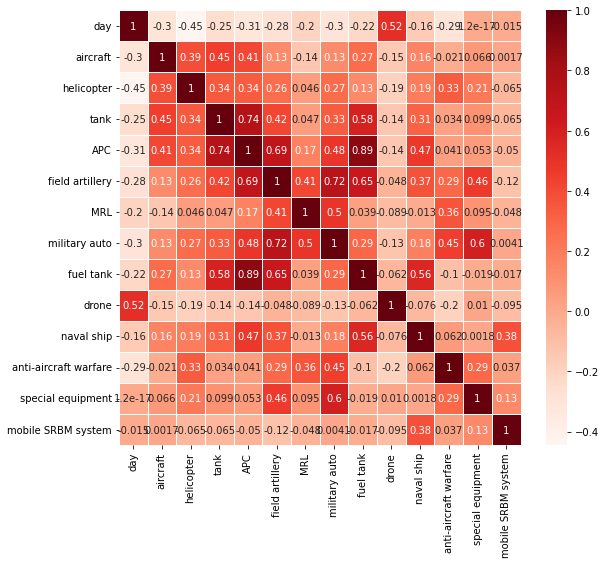

In [8]:
#correlation matrix for daily change
import matplotlib.pyplot as plt
import seaborn as sns

correlation_mat = df.corr() 
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(correlation_mat,ax=ax, annot=True, cmap = 'Reds',linewidths=0.5)

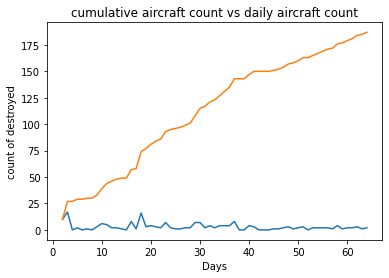

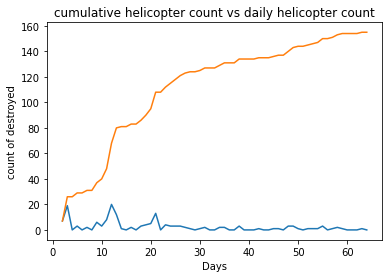

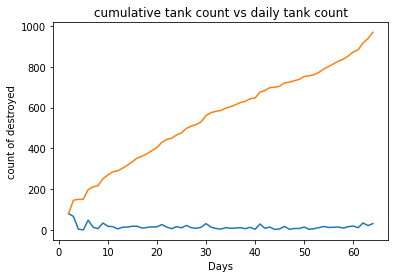

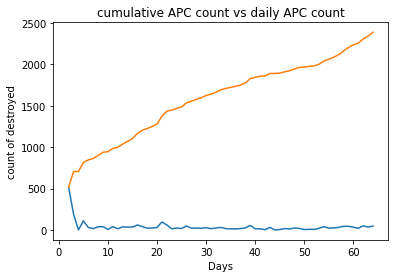

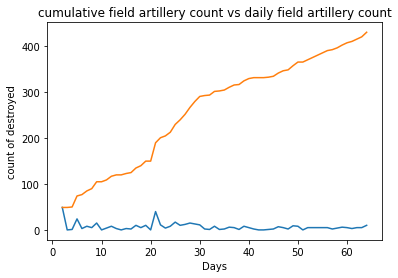

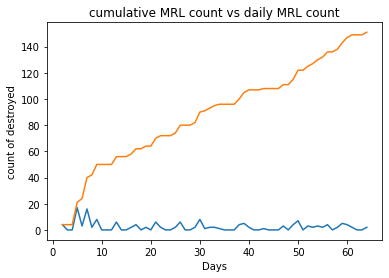

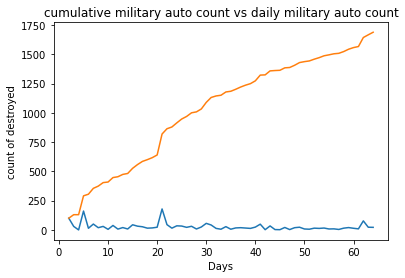

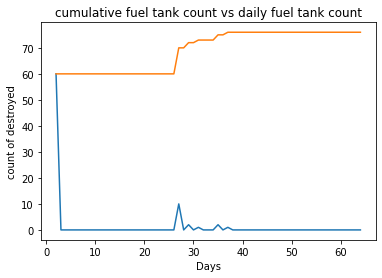

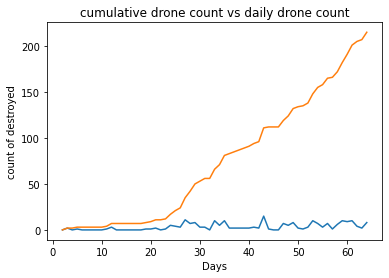

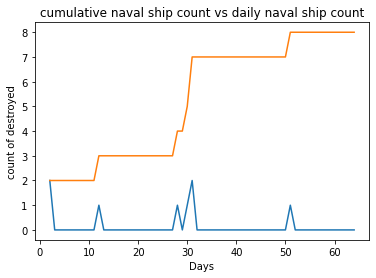

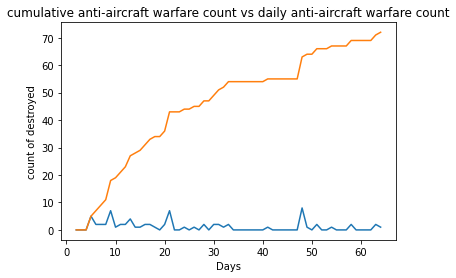

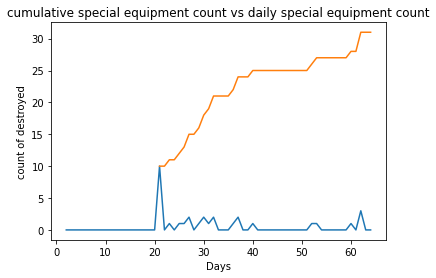

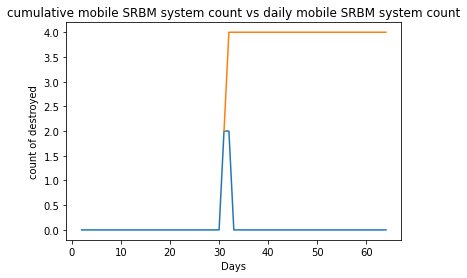

In [9]:
#Normal Plotting for day vs equipment under daily change
#needed_list=["aircraft","helicopter","tank","APC","field artillery","MRL","military auto","fuel tank","drone","naval ship","anti-aircraft warfare","special equipment","mobile SRBM system"]
#for (columnName_1, columnData_1)  in df.iteritems():
 #   for (columnName_2, columnData_2)  in df.iteritems():
  #      if columnName_1=="day" and columnName_2 in needed_list:
   #         plt.stem(columnData_1,columnData_2)
    #        plt.xlabel(columnName_1)
     #       plt.ylabel(columnName_2)
      #      plt.show()
from matplotlib.pyplot import plot
df1 = pd.read_csv('/kaggle/input/2022-ukraine-russian-war/russia_losses_equipment.csv')
needed_list=["aircraft","helicopter","tank","APC","field artillery","MRL","military auto","fuel tank","drone","naval ship","anti-aircraft warfare","special equipment","mobile SRBM system"]
#Merged Plotting for both cumulative and daily change
for (columnName_1, columnData_1)  in df.iteritems():
    for (columnName_2, columnData_2)  in df.iteritems():
        if columnName_1=="day" and columnName_2 in needed_list:
            data=[df[columnName_1],df[columnName_2],df1[columnName_2]]
            headers=["day","daily_aircraft_count","cumulative aircraft count"]
            plot(pd.concat(data,axis=1,keys=headers).set_index('day'))
            plt.xlabel("Days")
            plt.ylabel("count of destroyed")
            plt.title("cumulative "+columnName_2+" count vs daily "+columnName_2+" count")
            plt.show()
            
#All Feature PairGrid Plot - Seaborn
#import seaborn as sns
#g = sns.PairGrid(df)
#g.map(sns.scatterplot)

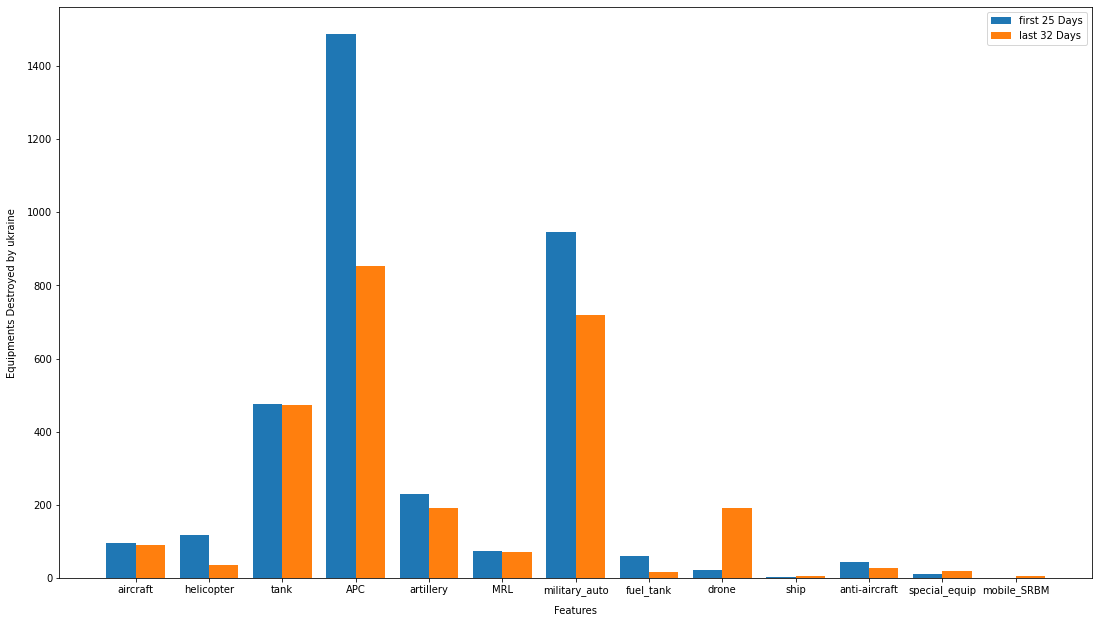

In [10]:
#First 25 days vs last remaining days  -  a bar to explore insights

#plt.barh(df.day[24],df.aircraft[:24].cumsum())
#plt.show()

import numpy as np
bar1_main=[]
bar2_main=[]
for (columnName, columnData)  in df.iteritems():
    X_axis = np.arange(len(needed_list))
    if columnName in needed_list:
        bar1=columnData[:24].sum()
        bar2=columnData[25:].sum()
        bar1_main.append(bar1)
        bar2_main.append(bar2)
        
plt.bar(X_axis - 0.2, bar1_main , 0.4, label = 'first 25 Days')
plt.bar(X_axis + 0.2, bar2_main , 0.4, label = 'last 32 Days')
plot_name=["aircraft","helicopter","tank","APC","artillery","MRL","military_auto","fuel_tank","drone","ship","anti-aircraft","special_equip","mobile_SRBM"]
plt.xticks(X_axis, plot_name)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.legend()
plt.xlabel("Features",labelpad=10)
plt.ylabel("Equipments Destroyed by ukraine",labelpad=10)
plt.show()

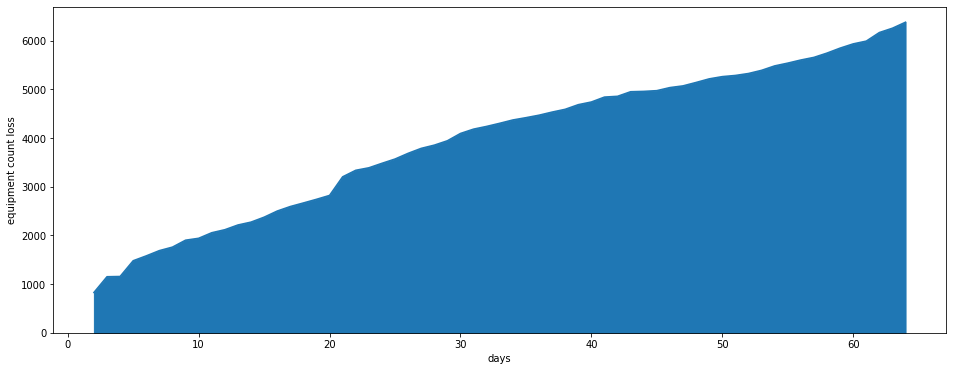

In [11]:
#Daily Total Loss of equipments
new_df=pd.read_csv('/kaggle/input/2022-ukraine-russian-war/russia_losses_equipment.csv')
total_loss_day_basis = new_df
total_loss_day_basis.drop(columns={'date'}, inplace=True)
total_loss_day_basis.set_index('day', inplace=True)
total_loss_day_basis['Daily equipment loss'] = pd.DataFrame(total_loss_day_basis.sum(axis=1))
total_loss_day_basis['Daily equipment loss'].plot(figsize=(16,6),kind="area")
plt.xlabel('days')
plt.ylabel('equipment count loss')
plt.show()

In [12]:
#Reading the data through pandas
df_personnel = pd.read_csv('/kaggle/input/2022-ukraine-russian-war/russia_losses_personnel.csv')
df_personnel.head()

,date,day,personnel,personnel*,POW
0,2022-02-25,2,2800,about,0
1,2022-02-26,3,4300,about,0
2,2022-02-27,4,4500,about,0
3,2022-02-28,5,5300,about,0
4,2022-03-01,6,5710,about,200


In [13]:
df_personnel.describe()

,day,personnel,POW
count,63.000000,63.000000,63.000000
mean,33.000000,15689.142857,388.126984
std,18.330303,5083.806406,131.105411
min,2.000000,2800.000000,0.000000
25%,17.500000,12000.000000,389.000000
50%,33.000000,17000.000000,421.000000
75%,48.500000,19700.000000,477.000000
max,64.000000,22800.000000,496.000000


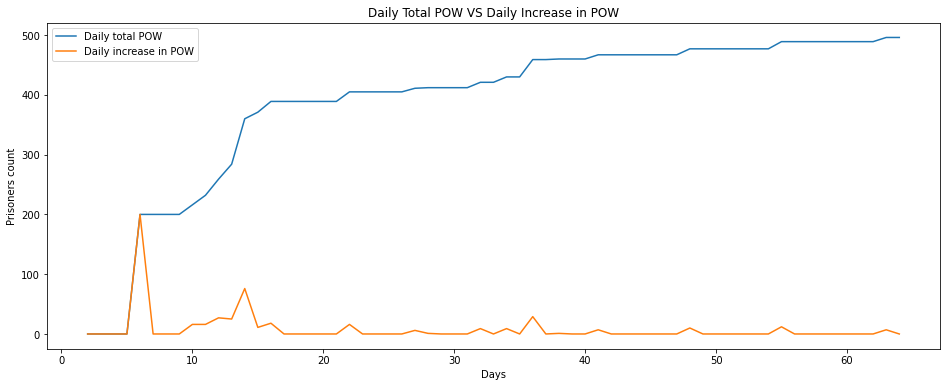

In [14]:
initial = 0
Data = []

for i in (df_personnel['POW'].values):
    value = i - initial
    Data.append(value)
    initial = i

df_personnel['Daily increase in POW'] = Data
df_personnel_structured = df_personnel[['day', 'POW', 'Daily increase in POW']].set_index('day')
df_personnel_structured.rename(columns={'POW':'Daily total POW'}, inplace=True)
#df_personnel_structured
df_personnel_structured.plot(figsize=(16,6))
plt.xlabel('Days')
plt.ylabel('Prisoners count')
plt.title("Daily Total POW VS Daily Increase in POW")
plt.show()
        

In [15]:
df_personnel_structured.describe()

,Daily total POW,Daily increase in POW
count,63.000000,63.000000
mean,388.126984,7.873016
std,131.105411,27.185440
min,0.000000,0.000000
25%,389.000000,0.000000
50%,421.000000,0.000000
75%,477.000000,6.500000
max,496.000000,200.000000
